In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
def save_fig(fig,fig_name,**kwargs):
    # saves the figure to a common folder
    import os
    if not os.path.exists("figures"):
        os.mkdir("figures")
    fig.savefig(fname= "figures/{}".format(fig_name) , **kwargs)
    
def rms(values):
    # return the Root Mean Square 
    # More info at https://en.wikipedia.org/wiki/Root_mean_square
    return np.sqrt(np.sum(values**2)/len(values))

def plot_rms_general_stats(df,dataset_name):
    cols = df.columns.to_list()[:-1]
    df1 = df.groupby(["timestamp"])[cols].apply(rms).reset_index()
    df1.index = pd.to_datetime(df1.timestamp,unit='s')
    with plt.style.context('seaborn-paper'):
        myFmt = mdates.DateFormatter('%d')
        fig,ax = plt.subplots()
        if len(cols) <6:
            ax.plot(df1.b1_ch1,label = "Bearing 1")
            ax.plot(df1.b2_ch2,label = "Bearing 2")
            ax.plot(df1.b3_ch3,label = "Bearing 3")
            ax.plot(df1.b4_ch4,label = "Bearing 4")
        else:
            ax.plot(df1.b1_ch1,label = "Bearing 1 C-X")
            ax.plot(df1.b1_ch2,label = "Bearing 1 C-Y ")
            ax.plot(df1.b2_ch3,label = "Bearing 2 C-X")
            ax.plot(df1.b2_ch4,label = "Bearing 2 C-Y")
            
            ax.plot(df1.b3_ch5,label = "Bearing 3 C-X")
            ax.plot(df1.b3_ch6,label = "Bearing 3 C-Y")
            ax.plot(df1.b4_ch7,label = "Bearing 4 C-X")
            ax.plot(df1.b4_ch8,label = "Bearing 4 C-Y")
        ax.set_xlabel ("Days")
        ax.legend()
        ax.xaxis.set_major_formatter(myFmt)
        ax.grid()
        ax.set_title("RMS of the bearing vibration snapshots")
        save_fig(fig,"{}.png".format(dataset_name),figsize = (12,6),dpi = 300)

def plot_mean_abs_general_stats(df,dataset_name):
    cols = df.columns.to_list()[:-1]
    df = df.abs()
    df1 = df.groupby(["timestamp"]).mean().reset_index()
    df1.index = pd.to_datetime(df1.timestamp,unit='s')
    with plt.style.context('seaborn-paper'):
        myFmt = mdates.DateFormatter('%d')
        fig,ax = plt.subplots()
        if len(cols) <6:
            ax.plot(df1.b1_ch1,label = "Bearing 1")
            ax.plot(df1.b2_ch2,label = "Bearing 2")
            ax.plot(df1.b3_ch3,label = "Bearing 3")
            ax.plot(df1.b4_ch4,label = "Bearing 4")
        else:
            ax.plot(df1.b1_ch1,label = "Bearing 1 C-X")
            ax.plot(df1.b1_ch2,label = "Bearing 1 C-Y ")
            ax.plot(df1.b2_ch3,label = "Bearing 2 C-X")
            ax.plot(df1.b2_ch4,label = "Bearing 2 C-Y")
            
            ax.plot(df1.b3_ch5,label = "Bearing 3 C-X")
            ax.plot(df1.b3_ch6,label = "Bearing 3 C-Y")
            ax.plot(df1.b4_ch7,label = "Bearing 4 C-X")
            ax.plot(df1.b4_ch8,label = "Bearing 4 C-Y")
        ax.set_xlabel ("Days")
        ax.legend()
        ax.xaxis.set_major_formatter(myFmt)
        ax.grid()
        ax.set_title("Absolute mean of the bearing vibration snapshots")
        save_fig(fig,"{}.png".format(dataset_name),figsize = (12,6),dpi = 300)

In [3]:
df1 = pd.read_pickle("../data/1st_test_full.pkl") # first dataset
df2 = pd.read_pickle("../data/2nd_test_full.pkl") # second one
df3 = pd.read_pickle("../data/3th_test_full.pkl") # third one

# 1. General Stats of the Datasets  
In the next cells are computed the number of seconds between the first recording and the last one, the information of the DataFrame and brief description of the values in each column

In [5]:
df1.timestamp.values[-1]-df1.timestamp.values[0] # time in seconds of the test

2769032

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44154880 entries, 0 to 44154879
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   b1_ch1     float32
 1   b1_ch2     float32
 2   b2_ch3     float32
 3   b2_ch4     float32
 4   b3_ch5     float32
 5   b3_ch6     float32
 6   b4_ch7     float32
 7   b4_ch8     float32
 8   timestamp  int64  
dtypes: float32(8), int64(1)
memory usage: 1.6 GB


In [7]:
df1.describe()

,b1_ch1,b1_ch2,b2_ch3,b2_ch4,b3_ch5,b3_ch6,b4_ch7,b4_ch8,timestamp
count,4.415488e+07,4.415488e+07,4.415488e+07,4.415488e+07,4.415488e+07,4.415488e+07,4.415488e+07,4.415488e+07,4.415488e+07
mean,-1.159463e-01,-1.157034e-01,-1.157602e-01,-1.156510e-01,-1.127604e-01,-1.128767e-01,-1.128493e-01,-1.127207e-01,1.068656e+09
std,9.888998e-02,8.933114e-02,9.482668e-02,7.862779e-02,1.181106e-01,1.215672e-01,9.633911e-02,9.893755e-02,8.468994e+05
min,-1.042000e+00,-1.086000e+00,-9.910000e-01,-8.300000e-01,-5.000000e+00,-5.000000e+00,-3.975000e+00,-3.801000e+00,1.066817e+09
25%,-1.780000e-01,-1.730000e-01,-1.780000e-01,-1.660000e-01,-1.860000e-01,-1.880000e-01,-1.660000e-01,-1.680000e-01,1.067866e+09
50%,-1.150000e-01,-1.150000e-01,-1.150000e-01,-1.150000e-01,-1.120000e-01,-1.120000e-01,-1.120000e-01,-1.120000e-01,1.068916e+09
75%,-5.400000e-02,-5.900000e-02,-5.100000e-02,-6.300000e-02,-3.900000e-02,-3.700000e-02,-6.100000e-02,-5.600000e-02,1.069369e+09
max,7.010000e-01,1.025000e+00,7.280000e-01,5.520000e-01,4.998000e+00,4.724000e+00,3.938000e+00,3.596000e+00,1.069800e+09


In [8]:
df2.timestamp.values[-1]-df2.timestamp.values[0]  # time in seconds of the test

589800

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20152320 entries, 0 to 20152319
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   b1_ch1     float32
 1   b2_ch2     float32
 2   b3_ch3     float32
 3   b4_ch4     float32
 4   timestamp  int64  
dtypes: float32(4), int64(1)
memory usage: 461.3 MB


In [10]:
df2.describe()

,b1_ch1,b2_ch2,b3_ch3,b4_ch4,timestamp
count,2.015232e+07,2.015232e+07,2.015232e+07,2.015232e+07,2.015232e+07
mean,-1.942865e-03,-1.559618e-03,-1.638145e-03,-2.959071e-03,1.076873e+09
std,1.210052e-01,9.983306e-02,1.055347e-01,6.141669e-02,1.704337e+05
min,-5.000000e+00,-8.840000e-01,-1.035000e+00,-5.660000e-01,1.076578e+09
25%,-6.100000e-02,-6.800000e-02,-6.800000e-02,-4.200000e-02,1.076726e+09
50%,-2.000000e-03,-2.000000e-03,-2.000000e-03,-2.000000e-03,1.076873e+09
75%,5.900000e-02,6.300000e-02,6.300000e-02,3.700000e-02,1.077021e+09
max,4.998000e+00,1.118000e+00,1.284000e+00,7.060000e-01,1.077168e+09


In [11]:
df3.timestamp.values[-1]-df3.timestamp.values[0]  # time in seconds of the test

3860109

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129515520 entries, 0 to 129515519
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   b1_ch1     float32
 1   b2_ch2     float32
 2   b3_ch3     float32
 3   b4_ch4     float32
 4   timestamp  int64  
dtypes: float32(4), int64(1)
memory usage: 2.9 GB


In [13]:
df3.describe()

,b1_ch1,b2_ch2,b3_ch3,b4_ch4,timestamp
count,1.295155e+08,1.295155e+08,1.295155e+08,1.295155e+08,1.295155e+08
mean,-2.366676e-03,-1.921651e-03,-2.073060e-03,-3.345554e-03,1.080315e+09
std,7.441603e-02,8.183451e-02,7.862205e-02,5.735590e-02,1.112661e+06
min,-1.072000e+00,-1.292000e+00,-5.000000e+00,-1.104000e+00,1.078389e+09
25%,-5.100000e-02,-5.600000e-02,-4.900000e-02,-3.900000e-02,1.079352e+09
50%,-2.000000e-03,-5.000000e-03,-2.000000e-03,-2.000000e-03,1.080327e+09
75%,4.600000e-02,5.100000e-02,4.400000e-02,3.200000e-02,1.081275e+09
max,9.640000e-01,9.620000e-01,4.998000e+00,1.082000e+00,1.082249e+09


# 2. Representation of the samples of the datasets
The next cell will show general representations of the samples of the datesets. Two approaches will be shown:
* Absolute mean: absolute mean of the samples that are computed in the same interval
* Root mean square: the root mean square computed the same way as the absolute mean

/var/folders/zb/_bmj04ls2p5ftg6fr3nf438r0000gn/T/ipykernel_93031/718946909.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(fname= "figures/{}".format(fig_name) , **kwargs)
/var/folders/zb/_bmj04ls2p5ftg6fr3nf438r0000gn/T/ipykernel_93031/718946909.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(fname= "figures/{}".format(fig_name) , **kwargs)
/var/folders/zb/_bmj04ls2p5ftg6fr3nf438r0000gn/T/ipykernel_93031/718946909.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(fname= "figures/{}".format(fig_name) , **kwargs)
/var/folders/zb/_bmj04ls2p5ftg6fr3nf438r0000gn/T/ipyker

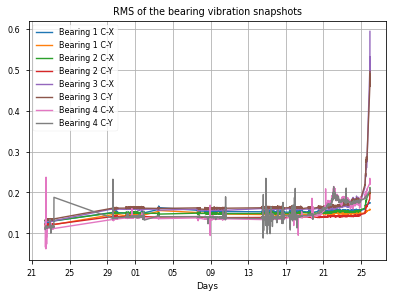

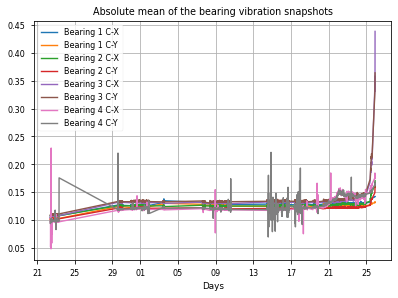

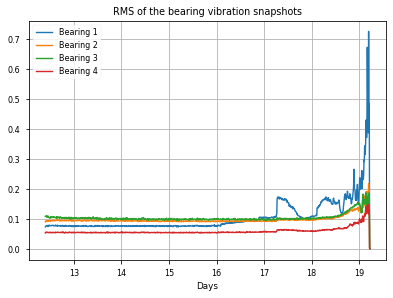

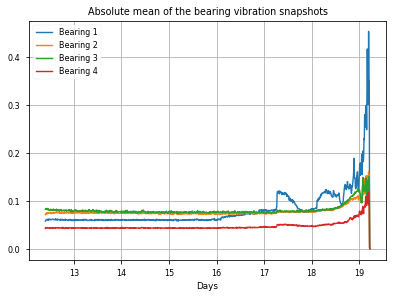

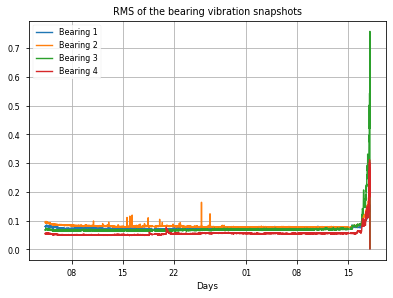

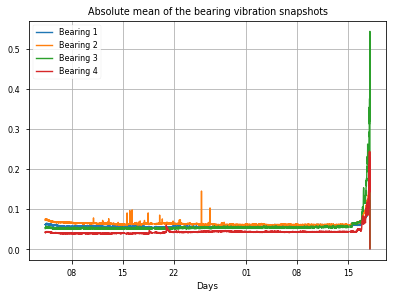

In [14]:
plot_rms_general_stats(df1,"rms_dataset1")
plot_mean_abs_general_stats(df1,"mean_abs_dataset1")
plot_rms_general_stats(df2,"rms_dataset2")
plot_mean_abs_general_stats(df2,"mean_abs_dataset2")
plot_rms_general_stats(df3,"rms_dataset3")
plot_mean_abs_general_stats(df3,"mean_abs_dataset3")